<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/Noise_dimension_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import skimage.util.noise as noise #Denoise 패키지인 Sckit.image의 util모듈. return 값은 numpy로 다루는 ndarray임. https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [40]:
train_set = datasets.MNIST('./data',train=True, download=True,transform=transforms.ToTensor())
test_set = datasets.MNIST('./data',train=False, download=False,transform=transforms.ToTensor())

tr_subset, val_subset = torch.utils.data.random_split(train_set,(50000,10000),generator=torch.Generator().manual_seed(1))

X_train_set = tr_subset.dataset.data[tr_subset.indices] #이미지 데이터
Y_train_set = tr_subset.dataset.targets[tr_subset.indices] # 정답 라벨

X_val_set = val_subset.dataset.data[val_subset.indices]
Y_val_set = val_subset.dataset.targets[val_subset.indices]


In [41]:
train_set_arr=X_train_set.numpy() #numpy 자료형(ndarray) 변환.
test_set_arr=test_set.data.numpy()

In [42]:
Snp_train_set_arr1 = noise.random_noise(train_set_arr,mode='s&p',amount=0.1) #함수 random_noise를 사용한다. speckle도 추가 가능
Snp_train_set_arr2 = noise.random_noise(train_set_arr,mode='s&p',amount=0.3)
Snp_train_set_arr3 = noise.random_noise(train_set_arr,mode='s&p',amount=0.5)

Gn_train_set_arr1 = noise.random_noise(train_set_arr,mode='gaussian',mean=0.1) #gaussian,speckle noise의 비율을 결정하는 파라미터인 mean이다. default는 0이다.
Gn_train_set_arr2 = noise.random_noise(train_set_arr,mode='gaussian',mean=0.3)
Gn_train_set_arr3 = noise.random_noise(train_set_arr,mode='gaussian',mean=0.5)


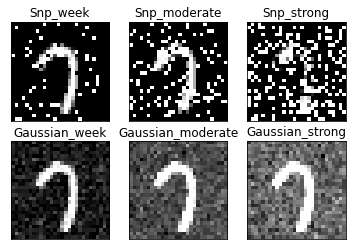

In [43]:

# 각 데이터셋에서 이미지를 하나씩 추출한다. snp_train_set_arr1[0] 배열로 말이다.
# 총 6개의 이미지를 표현한다고 생각하자. plt라이브러리를 사용한다.
# corrupted_input으로 enumerate로 나열시켜서 만들어주면 편할 것이다

plt.imshow(Snp_train_set_arr1[0],cmap='gray')

titles = ['Snp_week', 'Snp_moderate', 'Snp_strong', 'Gaussian_week', 'Gaussian_moderate', 'Gaussian_strong']
images = [ Snp_train_set_arr1[0], Snp_train_set_arr2[0], Snp_train_set_arr3[0], Gn_train_set_arr1[0], Gn_train_set_arr2[0], Gn_train_set_arr3[0]]

for i in range(6):
  plt.subplot(2,3,i+1), plt.imshow(images[i],cmap='gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([]) #xticks?


In [44]:
Snp_week = torch.from_numpy(Snp_train_set_arr1).float().div(255).unsqueeze(1)
Snp_moderate = torch.from_numpy(Snp_train_set_arr2)
Snp_strong = torch.from_numpy(Snp_train_set_arr3)

Gaussian_week = torch.from_numpy(Gn_train_set_arr1)
Gaussian_moderate = torch.from_numpy(Gn_train_set_arr2)
Gaussian_strong = torch.from_numpy(Gn_train_set_arr3)

In [45]:
custom_snp_train_data = []
for i in range(len(Snp_week)):
   custom_snp_train_data.append([Snp_week[i], Y_train_set[i]])


In [57]:
num_workers= 2
batch_size = 256

origin_loader = DataLoader(tr_subset,batch_size=batch_size)
Custom_Snp_week_Loader = DataLoader(custom_snp_train_data, batch_size = batch_size)

#print(data[0].shape)
list = torch.rand(50000,1,28,28)
list_loader = DataLoader(list, batch_size = batch_size)

#for data,labels in origin_loader:
#  break

#for data,list in zip(origin_loader,list_loader):
#  break

#for i,(origin,list) in enumerate(zip(origin_loader,list_loader)):
#  break

for i,(noisy,origin) in enumerate(zip(Custom_Snp_week_Loader,origin_loader)):
  corrupted_img,_  = noisy
  origin_img,_ = origin
  
  break
#  batch_img,_ = data
#  origin_img,_ = origin
  

#for i, (batch_img,origin_img)  in enumerate(zip(Custom_Snp_week_Loader, origin_loader)):
#   print(batch_img[i].shape)



In [47]:
dsorigin_loader_1= iter(origin_loader)
origin_loader_2 = origin_loader_1.next()
print(origin_loader_2[0].shape)


NameError: ignored

In [ ]:
names = ['Alice','Bob','Charlie']
ages = [24, 50, 18]



for i, (name,age) in enumerate(zip(names,ages)):
  print(i,name,age)